<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [63]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [64]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [65]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [66]:
# Task 3 - Load Dataset
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [67]:
# have a look at the data
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [68]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [69]:
# Task 4 - Generate Descriptive Statistics and Visualizations

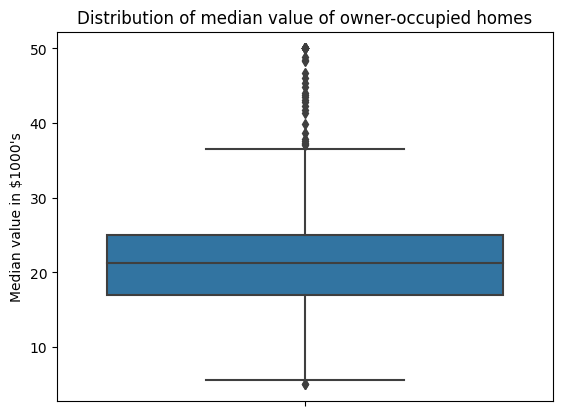

In [70]:
# For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(data=boston_df, y='MEDV')
plt.title("Distribution of median value of owner-occupied homes")
plt.ylabel("Median value in $1000's")
plt.show()

# Result: The lower quartile of the median value of owner-occupied homes is ca. 18.000$ while the upper quartile is ca. 25.000$.
# The minimum and maximum values are ca. 5.000$ and 37.000$, respectively. Outliers can be found that go as far as 50.000$. The mean is ca. 22.000$.

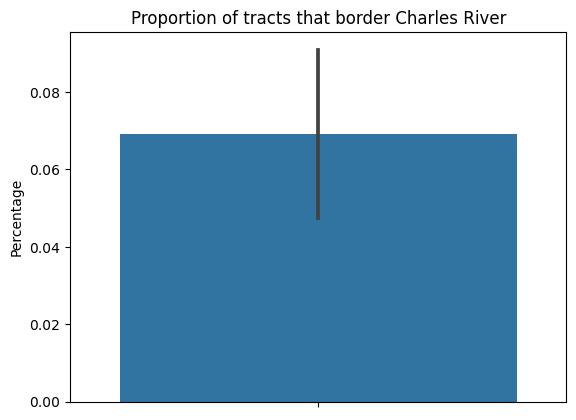

In [71]:
# Provide a bar plot for the Charles river variable

sns.barplot(data=boston_df, y="CHAS")
plt.title("Proportion of tracts that border Charles River")
plt.ylabel("Percentage")
plt.show()

# Result: Only about 7% of all tracts border the Charles River.

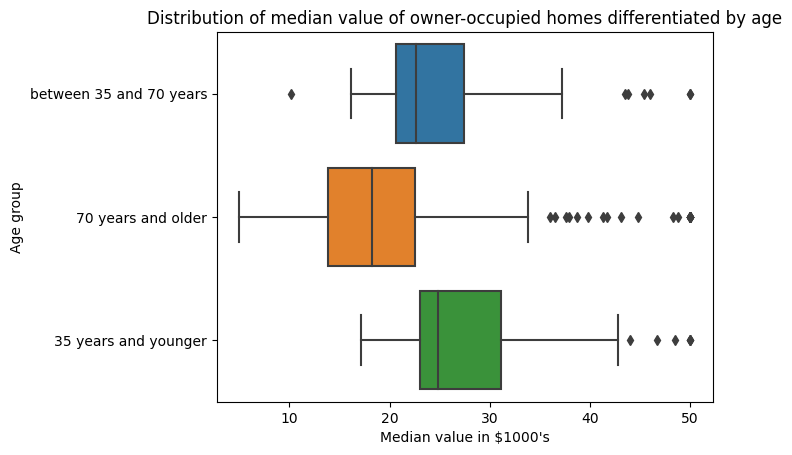

In [72]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(data=boston_df, x='MEDV', y='age_group')
plt.title("Distribution of median value of owner-occupied homes differentiated by age")
plt.xlabel("Median value in $1000's")
plt.ylabel("Age group")
plt.show()

# Result: It can be seen that houses with 70+ years have median values between 5.000$ and 50.000$, while most of those houses have
# a median value between ca. 14.000$ and 22.000$. Houses aged between 35 and 70 years have an interquartile range of ca. 21.000$ to 27.000$, 
# while houses aged 35 years and younger have a higher median value still: Here the interquartile range lies between ca. 22.000$ and 31.000$.

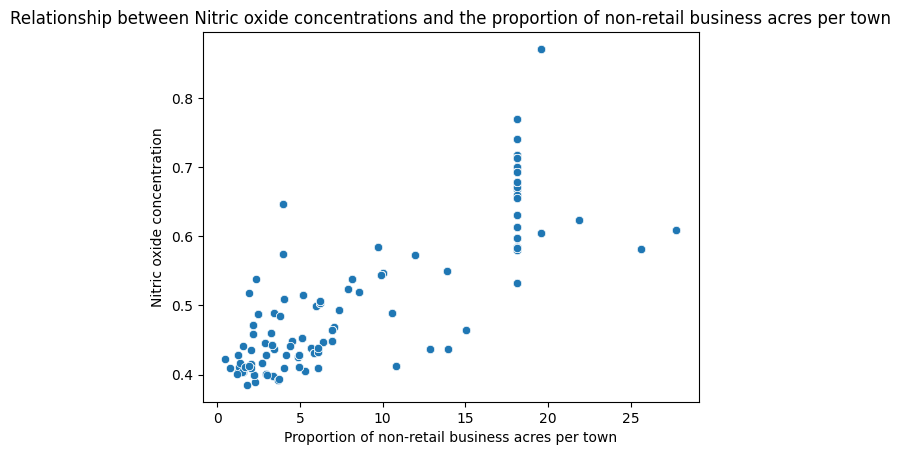

In [73]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
# What can you say about the relationship?

sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Nitric oxide concentration")
plt.show()

# Result: There is a positive linear correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town,
# i.e. a higher proportion of non-retail business acres per town means also a higher Nitric oxide concentration.

<ipython-input-74-7a710f8fda36>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], kde = False)


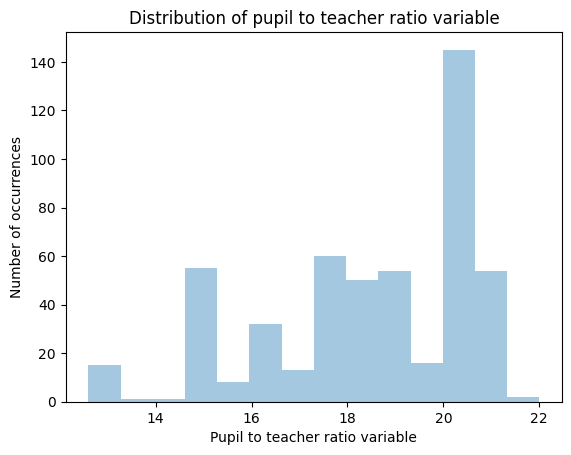

In [74]:
# Create a histogram for the pupil to teacher ratio variable

sns.distplot(boston_df['PTRATIO'], kde = False)
plt.title("Distribution of pupil to teacher ratio variable")
plt.xlabel("Pupil to teacher ratio variable")
plt.ylabel("Number of occurrences")
plt.show()

# Result: It can be seen that usually a teacher teaches between 15 and 21 pupils, and a pupil to teacher ratio of 20 is most common.

In [75]:
# Task 5 - Use the appropriate tests to answer the questions provided

In [76]:
# For the following tests α = 0.05 is always used

In [77]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# H0: There is no difference in median value of houses bounded by the Charles River
# H1: There is a difference in median value of houses bounded by the Charles River

# check test significance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is smaller than 0.05, equality of variance cannot be assumed

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [78]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

# Conclusion: Since the p-value is smaller than 0.05, H0 is rejected and it must be concluded that there exists a statistically
# significant difference in median value of houses based on whether those houses are situated at the Charles River or not.

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

In [79]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# H0: There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940
# H1: There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940

f_statistic, p_value = scipy.stats.f_oneway(boston_df["MEDV"], boston_df["AGE"])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Conclusion: Since the p-value is almost 0, i.e. < 0.05, H0 is rejected and it must be concluded that there exists a statistically
# significant difference in median value of houses based on when the houses where built.

F_Statistic: 1223.1740271875933, P-Value: 3.20946197250671e-176


In [80]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
# (Pearson Correlation)

# H0: Nitric oxide concentrations is not correlated with the proportion of non-retail business acres per town
# H1: Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# Conclusion: Since the p-value is almost 0, i.e. < 0.05, H0 is rejected and it must be concluded that there exists a relationship between
# Nitric oxide concentrations and proportion of non-retail business acres per town. That confirms the previous findings in the scatterplot.

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

In [81]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
# (Regression analysis)

# H0: There is no impact of weighted distances to the five Boston employment centres on the median value of owner occupied homes
# H1: There is an impact of weighted distances to the five Boston employment centres on the median value of owner occupied homes

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# Conclusion: Since the p-value is shown as 0, i.e. < 0.05, H0 is rejected and it must be concluded that the weighted distances to the five
# Boston employment centres has an impact on the median value of owner occupied homes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        16:41:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""